In [2]:
import os
import math
import keras
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, Activation, AveragePooling2D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# train data augmentation
train_datagen = image.ImageDataGenerator(rescale = 1/255,horizontal_flip = True,zoom_range = 0.2,
   shear_range = 0.2,rotation_range = 20,width_shift_range = 0.2,height_shift_range = 0.2,validation_split = 0.1) 

train_generator = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Data/Train",
    target_size = (64,64), batch_size = 32,class_mode = 'categorical',shuffle = True,seed = 42,subset = 'training')

val_generator = train_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/Data/Train",target_size = (64,64), batch_size = 32,class_mode = 'categorical',
    shuffle = True,seed = 42,subset = 'validation')

Found 2183 images belonging to 2 classes.
Found 242 images belonging to 2 classes.


In [16]:
# test data augmentation
test_datagen =image.ImageDataGenerator(
   rescale =1/255)
test_data =test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Data/Test",target_size= (64,64),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 871 images belonging to 2 classes.


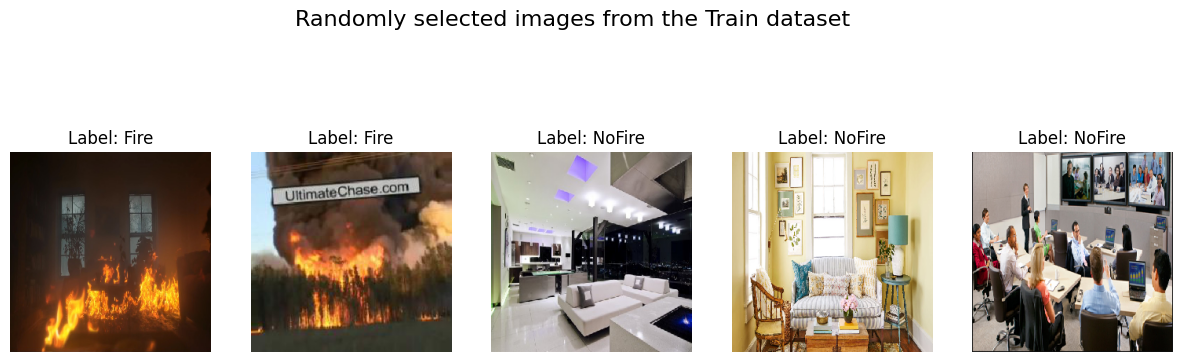

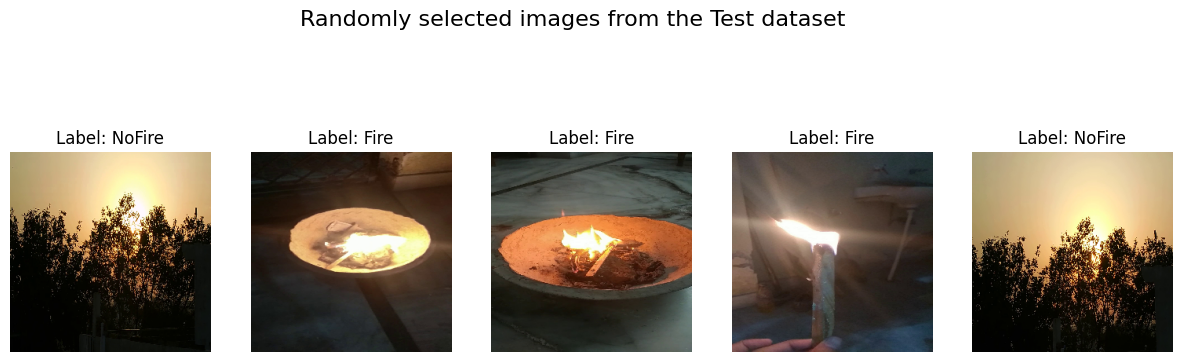

In [ ]:
# Define a function to plot images and their labels
def plot_images(images, labels, title):
    fig, axs = plt.subplots(nrows=1, ncols=len(images), figsize=(15,5))
    fig.suptitle(title, fontsize=16)

    for i in range(len(images)):
        axs[i].imshow(images[i])
        axs[i].set_title('Label: ' + str(labels[i]))
        axs[i].axis('off')

    plt.show()

# Select 5 random images from the Train dataset
train_image_paths = np.random.choice(train_data.filepaths, size=5, replace=False)
train_images = [image.load_img(path, target_size=(256,256)) for path in train_image_paths]
train_labels = [os.path.basename(os.path.dirname(path)) for path in train_image_paths]

# Select 5 random images from the Test dataset
test_image_paths = np.random.choice(test_data.filepaths, size=5, replace=False)
test_images = [image.load_img(path, target_size=(256,256)) for path in test_image_paths]
test_labels = [os.path.basename(os.path.dirname(path)) for path in test_image_paths]

# Convert images to arrays
train_images = np.array([image.img_to_array(img) for img in train_images])
test_images = np.array([image.img_to_array(img) for img in test_images])

# Rescale pixel values to range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Plot the selected images with their labels
plot_images(train_images, train_labels, 'Randomly selected images from the Train dataset')
plot_images(test_images, test_labels, 'Randomly selected images from the Test dataset')

In [7]:
model = Sequential()

model.add(Conv2D(14, kernel_size=(3,3), activation='relu', input_shape = (64,64,3), use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(15, kernel_size=(3,3), activation='relu', input_shape = (64,64,3), use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(18, kernel_size=(3,3), activation='sigmoid', use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(256, activation= 'sigmoid', use_bias=True))
model.add(Dropout(rate=0.2))

model.add(Dense(2, activation='softmax', use_bias=True))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 14)        392       
                                                                 
 average_pooling2d_3 (Averag  (None, 31, 31, 14)       0         
 ePooling2D)                                                     
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 14)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 15)        1905      
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 15)       0         
 ePooling2D)                                                     
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 15)       

In [9]:
cnnModel = model.fit(train_generator,steps_per_epoch = 68, epochs = 10,
                     validation_data = val_generator,validation_steps = 8)

Epoch 1/10
68/68 [==============================] - 322s 5s/step - loss: 0.7204 - accuracy: 0.5397 - val_loss: 0.6687 - val_accuracy: 0.6198
Epoch 2/10
68/68 [==============================] - 61s 897ms/step - loss: 0.6408 - accuracy: 0.6690 - val_loss: 0.5375 - val_accuracy: 0.7686
Epoch 3/10
68/68 [==============================] - 60s 881ms/step - loss: 0.5939 - accuracy: 0.6960 - val_loss: 0.5314 - val_accuracy: 0.7562
Epoch 4/10
68/68 [==============================] - 59s 867ms/step - loss: 0.5755 - accuracy: 0.7132 - val_loss: 0.5205 - val_accuracy: 0.7562
Epoch 5/10
68/68 [==============================] - 55s 813ms/step - loss: 0.5703 - accuracy: 0.7164 - val_loss: 0.5553 - val_accuracy: 0.7314
Epoch 6/10
68/68 [==============================] - 60s 884ms/step - loss: 0.5728 - accuracy: 0.6922 - val_loss: 0.5177 - val_accuracy: 0.7438
Epoch 7/10
68/68 [==============================] - 63s 919ms/step - loss: 0.5611 - accuracy: 0.7150 - val_loss: 0.5009 - val_accuracy: 0.7521
E

In [10]:
cnnModel = model.fit(train_generator,steps_per_epoch = 68, epochs = 20,
                     validation_data = val_generator,validation_steps = 8)

Epoch 1/20
68/68 [==============================] - 61s 895ms/step - loss: 0.5135 - accuracy: 0.7448 - val_loss: 0.4558 - val_accuracy: 0.7975
Epoch 2/20
68/68 [==============================] - 60s 884ms/step - loss: 0.5333 - accuracy: 0.7350 - val_loss: 0.4436 - val_accuracy: 0.7893
Epoch 3/20
68/68 [==============================] - 59s 871ms/step - loss: 0.5015 - accuracy: 0.7471 - val_loss: 0.4410 - val_accuracy: 0.8099
Epoch 4/20
68/68 [==============================] - 60s 879ms/step - loss: 0.4984 - accuracy: 0.7513 - val_loss: 0.4570 - val_accuracy: 0.7810
Epoch 5/20
68/68 [==============================] - 55s 811ms/step - loss: 0.4791 - accuracy: 0.7675 - val_loss: 0.4217 - val_accuracy: 0.8306
Epoch 6/20
68/68 [==============================] - 60s 885ms/step - loss: 0.4904 - accuracy: 0.7657 - val_loss: 0.4699 - val_accuracy: 0.7975
Epoch 7/20
68/68 [==============================] - 61s 886ms/step - loss: 0.4831 - accuracy: 0.7685 - val_loss: 0.4128 - val_accuracy: 0.8306

In [11]:
cnnModel = model.fit(train_generator,steps_per_epoch = 68, epochs = 30,
                     validation_data = val_generator,validation_steps = 8)

Epoch 1/30
68/68 [==============================] - 58s 856ms/step - loss: 0.4110 - accuracy: 0.8094 - val_loss: 0.3396 - val_accuracy: 0.8595
Epoch 2/30
68/68 [==============================] - 57s 842ms/step - loss: 0.4119 - accuracy: 0.8033 - val_loss: 0.3100 - val_accuracy: 0.8967
Epoch 3/30
68/68 [==============================] - 56s 835ms/step - loss: 0.3817 - accuracy: 0.8294 - val_loss: 0.3263 - val_accuracy: 0.8760
Epoch 4/30
68/68 [==============================] - 61s 909ms/step - loss: 0.4034 - accuracy: 0.8108 - val_loss: 0.3517 - val_accuracy: 0.8595
Epoch 5/30
68/68 [==============================] - 57s 827ms/step - loss: 0.4049 - accuracy: 0.8103 - val_loss: 0.3362 - val_accuracy: 0.8512
Epoch 6/30
68/68 [==============================] - 60s 889ms/step - loss: 0.3826 - accuracy: 0.8233 - val_loss: 0.3036 - val_accuracy: 0.9008
Epoch 7/30
68/68 [==============================] - 59s 875ms/step - loss: 0.3891 - accuracy: 0.8238 - val_loss: 0.4740 - val_accuracy: 0.7603

In [12]:
cnnModel = model.fit(train_generator,steps_per_epoch = 68, epochs = 40,
                     validation_data = val_generator,validation_steps = 8)

Epoch 1/40
68/68 [==============================] - 62s 908ms/step - loss: 0.3528 - accuracy: 0.8457 - val_loss: 0.2810 - val_accuracy: 0.9008
Epoch 2/40
68/68 [==============================] - 61s 902ms/step - loss: 0.3325 - accuracy: 0.8508 - val_loss: 0.2572 - val_accuracy: 0.9008
Epoch 3/40
68/68 [==============================] - 61s 901ms/step - loss: 0.3504 - accuracy: 0.8443 - val_loss: 0.2708 - val_accuracy: 0.9008
Epoch 4/40
68/68 [==============================] - 62s 911ms/step - loss: 0.3540 - accuracy: 0.8443 - val_loss: 0.2568 - val_accuracy: 0.9215
Epoch 5/40
68/68 [==============================] - 61s 901ms/step - loss: 0.3424 - accuracy: 0.8494 - val_loss: 0.2344 - val_accuracy: 0.9256
Epoch 6/40
68/68 [==============================] - 61s 887ms/step - loss: 0.3552 - accuracy: 0.8410 - val_loss: 0.2507 - val_accuracy: 0.9050
Epoch 7/40
68/68 [==============================] - 60s 884ms/step - loss: 0.3377 - accuracy: 0.8498 - val_loss: 0.2545 - val_accuracy: 0.9091

In [13]:
cnnModel = model.fit(train_generator,steps_per_epoch = 68, epochs = 50,
                     validation_data = val_generator,validation_steps = 8)

Epoch 1/50
68/68 [==============================] - 61s 902ms/step - loss: 0.3038 - accuracy: 0.8726 - val_loss: 0.2336 - val_accuracy: 0.9174
Epoch 2/50
68/68 [==============================] - 60s 881ms/step - loss: 0.3091 - accuracy: 0.8694 - val_loss: 0.2194 - val_accuracy: 0.9380
Epoch 3/50
68/68 [==============================] - 57s 843ms/step - loss: 0.3026 - accuracy: 0.8661 - val_loss: 0.1924 - val_accuracy: 0.9132
Epoch 4/50
68/68 [==============================] - 57s 831ms/step - loss: 0.3137 - accuracy: 0.8672 - val_loss: 0.2286 - val_accuracy: 0.9215
Epoch 5/50
68/68 [==============================] - 61s 884ms/step - loss: 0.3011 - accuracy: 0.8735 - val_loss: 0.2414 - val_accuracy: 0.9339
Epoch 6/50
68/68 [==============================] - 56s 829ms/step - loss: 0.3040 - accuracy: 0.8731 - val_loss: 0.1933 - val_accuracy: 0.9380
Epoch 7/50
68/68 [==============================] - 60s 884ms/step - loss: 0.3055 - accuracy: 0.8717 - val_loss: 0.2145 - val_accuracy: 0.9091

In [14]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data, steps=math.ceil(871/32))

test_accuracy_percentage = test_acc * 100
print('Test accuracy:', test_accuracy_percentage, '%')

28/28 [==============================] - 198s 7s/step - loss: 0.1998 - accuracy: 0.9323
Test accuracy: 93.22617650032043 %


In [58]:
#Save the weights
model.save_weights('/content/drive/MyDrive/As4078weights/BraE_weights.h5')

In [17]:
#Load the weights
model.load_weights('/content/drive/MyDrive/As4078weights/BraE_weights.h5')

In [18]:
def print_evaluation_metrics(model, test_data):
    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(test_data, steps=math.ceil(871/32))

    # Print the test accuracy
    test_accuracy_percentage = test_acc * 100
    print('Test accuracy:', test_accuracy_percentage, '%')

    # Make predictions on the test data
    test_predictions = model.predict(test_data, steps=math.ceil(871/32))

    # Convert the predictions from one-hot encoded format to class labels
    test_predictions_labels = np.argmax(test_predictions, axis=1)

    # Get the true class labels for the test data
    test_true_labels = test_data.classes

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(test_true_labels, test_predictions_labels)
    print('Confusion Matrix:\n', confusion_mat)

    # Compute the classification report
    class_report = classification_report(test_true_labels, test_predictions_labels)
    print('Classification Report:\n', class_report)

    # Compute the precision and recall values
    tp = np.diag(confusion_mat)
    fp = np.sum(confusion_mat, axis=0) - tp
    fn = np.sum(confusion_mat, axis=1) - tp
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print('Precision:', precision)
    print('Recall:', recall)

print('Test accuracy:', test_accuracy_percentage, '%')
print_evaluation_metrics(model, test_data)


Test accuracy: 93.22617650032043 %
28/28 [==============================] - 26s 948ms/step - loss: 0.1998 - accuracy: 0.9323
Test accuracy: 93.22617650032043 %
28/28 [==============================] - 25s 883ms/step
Confusion Matrix:
 [[389 204]
 [195  83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.66       593
           1       0.29      0.30      0.29       278

    accuracy                           0.54       871
   macro avg       0.48      0.48      0.48       871
weighted avg       0.55      0.54      0.54       871

Precision: [0.66609589 0.28919861]
Recall: [0.65598651 0.29856115]


In [19]:
import pandas as pd

# Enter the values for your model
your_trainable_params = 171403
your_accuracy = 93.22
your_precision = 66.61
your_recall = 65.60

# Enter the values for the reference paper's model
ref_trainable_params = 646818
ref_accuracy = 93.91
ref_precision = 97
ref_recall = 94

# Create a table to display the results
data = {'Model': ['Your Model', 'Reference Paper Model'],
        'Trainable Parameters': [your_trainable_params, ref_trainable_params],
        'Accuracy': [your_accuracy, ref_accuracy],
        'Precision': [your_precision, ref_precision],
        'Recall': [your_recall, ref_recall]}
df = pd.DataFrame(data)
print(df)


                   Model  Trainable Parameters  Accuracy  Precision  Recall
0             Your Model                171403     93.22      66.61    65.6
1  Reference Paper Model                646818     93.91      97.00    94.0


In [57]:
import os
from PIL import Image

# Define the paths to the subfolders
fire_folder = "/content/drive/MyDrive/new/Fire"
no_fire_folder = "/content/drive/MyDrive/new/NoFire"

# Create a list to store the predictions
predictions = []

# Loop through the fire images and get predictions
for filename in os.listdir(fire_folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(fire_folder, filename))
        img = img.resize((64, 64))
        img = np.array(img) / 255
        img = np.array([img])
        prediction = model.predict(img)
        if prediction.any() > 0.5:
            predictions.append('Fire detected')
        else:
            predictions.append('No fire detected')

# Loop through the no-fire images and get predictions
for filename in os.listdir(no_fire_folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(no_fire_folder, filename))
        img = img.resize((64, 64))
        img = np.array(img) / 255
        img = np.array([img])
        prediction = model.predict(img)
        if prediction.any() < 0.5:
            predictions.append('Fire detected')
        else:
            predictions.append('No fire detected')

# Print the predictions for all images
for i, prediction in enumerate(predictions):
    if i < 10:
        print(f"Fire image {i+1}: {prediction}")
    else:
        print(f"No fire image {i-9}: {prediction}")


1/1 [==============================] - 0s 23ms/step
Fire image 1: Fire detected
Fire image 2: Fire detected
Fire image 3: Fire detected
Fire image 4: Fire detected
Fire image 5: Fire detected
Fire image 6: Fire detected
Fire image 7: Fire detected
Fire image 8: Fire detected
Fire image 9: No fire detected
Fire image 10: No fire detected
No fire image 1: No fire detected
No fire image 2: No fire detected
No fire image 3: No fire detected
No fire image 4: No fire detected
No fire image 5: No fire detected
No fire image 6: No fire detected
No fire image 7: No fire detected
No fire image 8: No fire detected
